In [1]:
import numpy as np
import matplotlib.pyplot as plt

import scipy as sp
import scipy.linalg
import scipy.optimize

from mpl_toolkits.mplot3d import Axes3D

# %matplotlib widget

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
# tt0000 = np.loadtxt("../data/m0.000000Lx768Ly768alat0.010000tt0000.dat")
# tt0001 = np.loadtxt("../data/m0.000000Lx768Ly768alat0.010000tt0001.dat")
# tt0002 = np.loadtxt("../data/m0.000000Lx768Ly768alat0.010000tt0002.dat")

# tt0100 = np.loadtxt("../data/m0.000000Lx768Ly768alat0.010000tt0100.dat")
# tt0101 = np.loadtxt("../data/m0.000000Lx768Ly768alat0.010000tt0101.dat")
# tt0102 = np.loadtxt("../data/m0.000000Lx768Ly768alat0.010000tt0102.dat")

# tt0200 = np.loadtxt("../data/m0.000000Lx768Ly768alat0.010000tt0200.dat")
# tt0201 = np.loadtxt("../data/m0.000000Lx768Ly768alat0.010000tt0201.dat")
# tt0202 = np.loadtxt("../data/m0.000000Lx768Ly768alat0.010000tt0202.dat")

In [3]:
# tt0000 = np.loadtxt("../data/m0.000000Lx768Ly768alat0.010000ortho0tt0000.dat")
# tt0001 = np.loadtxt("../data/m0.000000Lx768Ly768alat0.010000ortho0tt0001.dat")
# tt0002 = np.loadtxt("../data/m0.000000Lx768Ly768alat0.010000ortho0tt0002.dat")

# tt0100 = np.loadtxt("../data/m0.000000Lx768Ly768alat0.010000ortho0tt0100.dat")
# tt0101 = np.loadtxt("../data/m0.000000Lx768Ly768alat0.010000ortho0tt0101.dat")
# tt0102 = np.loadtxt("../data/m0.000000Lx768Ly768alat0.010000ortho0tt0102.dat")

# tt0200 = np.loadtxt("../data/m0.000000Lx768Ly768alat0.010000ortho0tt0200.dat")
# tt0201 = np.loadtxt("../data/m0.000000Lx768Ly768alat0.010000ortho0tt0201.dat")
# tt0202 = np.loadtxt("../data/m0.000000Lx768Ly768alat0.010000ortho0tt0202.dat")

In [4]:
tt0000 = np.loadtxt("../data/m0.000000Lx3072Ly3072alat0.010000ortho0tt0000.dat")
tt0001 = np.loadtxt("../data/m0.000000Lx3072Ly3072alat0.010000ortho0tt0001.dat")
tt0002 = np.loadtxt("../data/m0.000000Lx3072Ly3072alat0.010000ortho0tt0002.dat")

tt0100 = np.loadtxt("../data/m0.000000Lx3072Ly3072alat0.010000ortho0tt0100.dat")
tt0101 = np.loadtxt("../data/m0.000000Lx3072Ly3072alat0.010000ortho0tt0101.dat")
tt0102 = np.loadtxt("../data/m0.000000Lx3072Ly3072alat0.010000ortho0tt0102.dat")

tt0200 = np.loadtxt("../data/m0.000000Lx3072Ly3072alat0.010000ortho0tt0200.dat")
tt0201 = np.loadtxt("../data/m0.000000Lx3072Ly3072alat0.010000ortho0tt0201.dat")
tt0202 = np.loadtxt("../data/m0.000000Lx3072Ly3072alat0.010000ortho0tt0202.dat")

In [5]:
alat = 0.01
Lx = 3072
Ly = 3072

# Lx = 768
# Ly = 768
m = 0.0

In [6]:
tmp = tt0000 - 0.5*(tt0001+tt0002) - 0.5*(tt0100+tt0200) + 0.25*(tt0101+tt0102+tt0201+tt0202)
T0T0 = np.array([tt0000.T[0], tt0000.T[1], tmp.T[2]]).T

In [7]:
lis_=[]
for elem in T0T0:
    # if elem[0])>1.0 and abs(elem[1])>1.0 and abs(elem[0]-767)>1.0 and abs(elem[1]-767)>1.0:
    lis_.append( [elem[0]+0.5*elem[1], np.sqrt(3)*0.5*elem[1], elem[2]] )
lis = np.array( lis_ )

In [9]:
# np.savetxt( "t0t0.dat", lis )

/var/folders/mg/t8fn6fpj4bj1f7zd8q4m_6p40000gn/T/ipykernel_26518/3649973970.py:6: RuntimeWarning: divide by zero encountered in divide
  y=1.0/x**2
/var/folders/mg/t8fn6fpj4bj1f7zd8q4m_6p40000gn/T/ipykernel_26518/3649973970.py:9: RuntimeWarning: divide by zero encountered in divide
  y=10.0/x**4


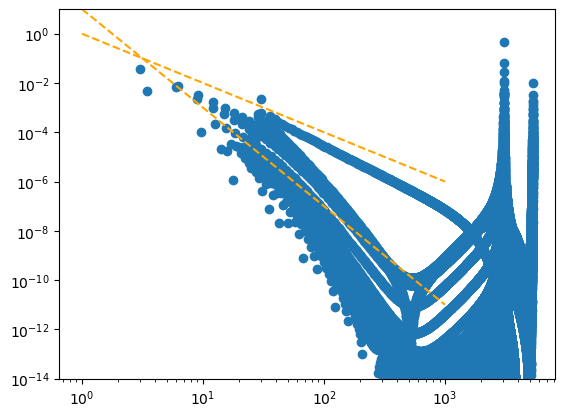

In [10]:
plt.close()
plt.scatter( np.sqrt(lis.T[0]**2+lis.T[1]**2), lis.T[2] )
# plt.scatter( lis.T[2], np.abs(lis.T[3]), alpha=0.2 )

x=np.arange( 1000 )
y=1.0/x**2
plt.plot( x,y, ls="dashed", c="orange", label="$1/r^2$" )

y=10.0/x**4
plt.plot( x,y, ls="dashed", c="orange", label="$1/r^4$" )

plt.yscale("log")
plt.xscale("log")
plt.ylim( 1.0e-14, 10 )

plt.savefig("t00t00_2dplot.pdf", bbox_inches="tight")

In [ ]:
z = lis.T[0]+0.5*lis.T[1]+1.0j*np.sqrt(3)*0.5*lis.T[1]

In [19]:
t00t00_analytic = np.real(1.0/z**4)

/var/folders/mg/t8fn6fpj4bj1f7zd8q4m_6p40000gn/T/ipykernel_26423/2795880382.py:1: RuntimeWarning: divide by zero encountered in divide
  t00t00_analytic = np.real(1.0/z**4)
/var/folders/mg/t8fn6fpj4bj1f7zd8q4m_6p40000gn/T/ipykernel_26423/2795880382.py:1: RuntimeWarning: invalid value encountered in divide
  t00t00_analytic = np.real(1.0/z**4)


/var/folders/mg/t8fn6fpj4bj1f7zd8q4m_6p40000gn/T/ipykernel_26423/2417582105.py:6: RuntimeWarning: divide by zero encountered in log
  ax.scatter(np.log(lis.T[0]), np.log(lis.T[1]), np.log(lis.T[2]), c='r', marker='o')
/var/folders/mg/t8fn6fpj4bj1f7zd8q4m_6p40000gn/T/ipykernel_26423/2417582105.py:6: RuntimeWarning: invalid value encountered in log
  ax.scatter(np.log(lis.T[0]), np.log(lis.T[1]), np.log(lis.T[2]), c='r', marker='o')


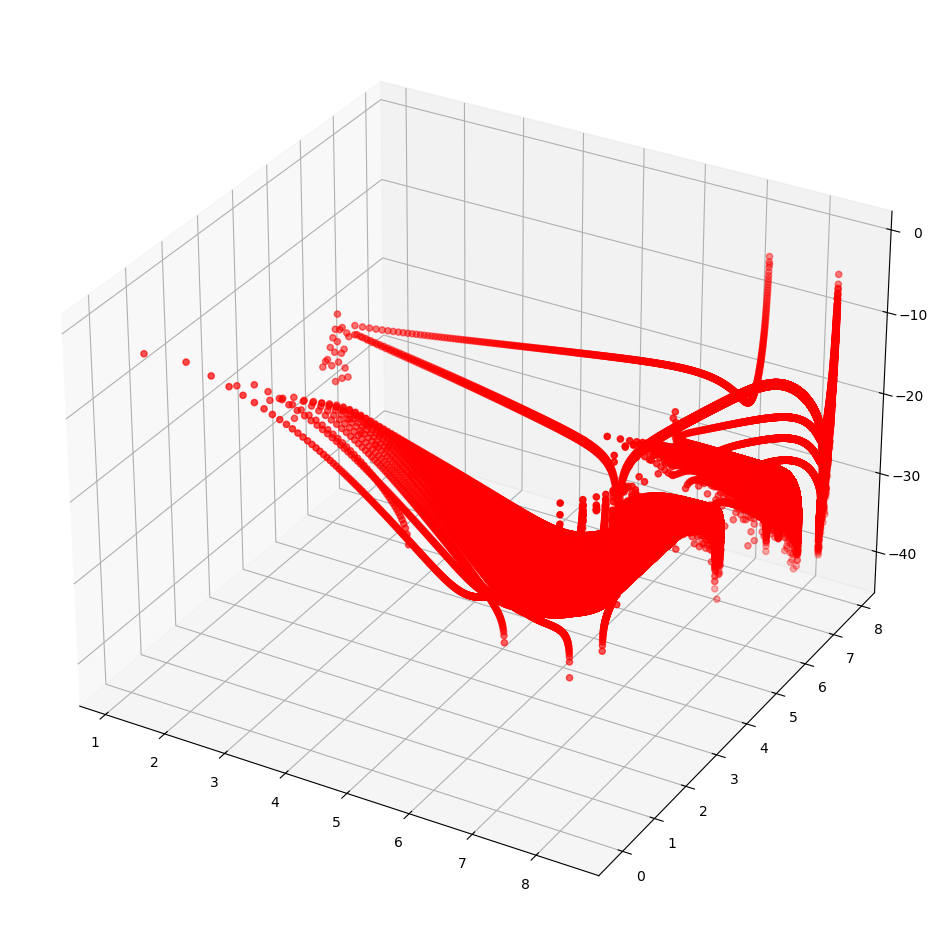

<Figure size 640x480 with 0 Axes>

In [20]:
plt.close()

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(np.log(lis.T[0]), np.log(lis.T[1]), np.log(lis.T[2]), c='r', marker='o')
# ax.scatter(lis.T[0], lis.T[1], np.log(-lis.T[2]), c='c', marker='o')

# ax.scatter(lis.T[0], lis.T[1], 3.0+np.log(t00t00_analytic), c='b', marker='o')
# ax.scatter(lis.T[0], lis.T[1], np.log(np.abs(lis.T[3])), c='b', alpha=0.1, marker='.')

# ax.set_xlabel('X Label')
# ax.set_ylabel('Y Label')
# ax.set_zlabel('Z Label')

# ax.set_zscale("log")

plt.show()
plt.savefig("t00t00_3dplot.pdf", bbox_inches="tight")

/tmp/ipykernel_11453/633924454.py:5: RuntimeWarning: invalid value encountered in log
  ax.scatter(lis.T[0], lis.T[1], np.log(-lis.T[2]), c='r', marker='o')
/tmp/ipykernel_11453/633924454.py:7: RuntimeWarning: invalid value encountered in log
  ax.scatter(lis.T[0], lis.T[1], 3.0+np.log(-t00t00_analytic), c='b', marker='o')


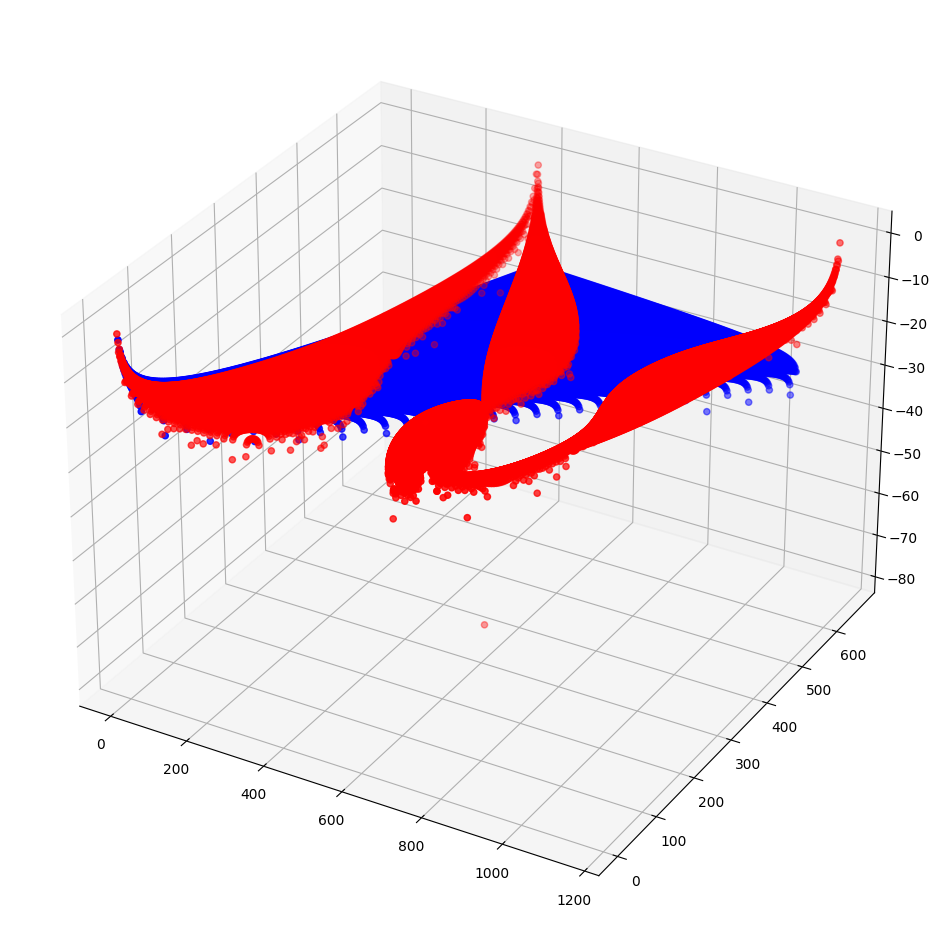

In [25]:
plt.close()

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(lis.T[0], lis.T[1], np.log(-lis.T[2]), c='r', marker='o')

ax.scatter(lis.T[0], lis.T[1], 3.0+np.log(-t00t00_analytic), c='b', marker='o')
# ax.scatter(lis.T[0], lis.T[1], np.log(np.abs(lis.T[3])), c='b', alpha=0.1, marker='.')

# ax.set_xlabel('X Label')
# ax.set_ylabel('Y Label')
# ax.set_zlabel('Z Label')

# ax.set_zscale("log")

plt.show()

In [2]:
tt0000 = np.loadtxt("../data/m0.000000Lx768Ly768alat0.010000ortho1tt0000.dat")
tt0001 = np.loadtxt("../data/m0.000000Lx768Ly768alat0.010000ortho1tt0001.dat")
tt0002 = np.loadtxt("../data/m0.000000Lx768Ly768alat0.010000ortho1tt0002.dat")

tt0100 = np.loadtxt("../data/m0.000000Lx768Ly768alat0.010000ortho1tt0100.dat")
tt0101 = np.loadtxt("../data/m0.000000Lx768Ly768alat0.010000ortho1tt0101.dat")
tt0102 = np.loadtxt("../data/m0.000000Lx768Ly768alat0.010000ortho1tt0102.dat")

tt0200 = np.loadtxt("../data/m0.000000Lx768Ly768alat0.010000ortho1tt0200.dat")
tt0201 = np.loadtxt("../data/m0.000000Lx768Ly768alat0.010000ortho1tt0201.dat")
tt0202 = np.loadtxt("../data/m0.000000Lx768Ly768alat0.010000ortho1tt0202.dat")

In [3]:
alat = 0.01
Lx = 768
Ly = 768
m = 0.0

In [4]:
T0T0 = tt0000 - 0.5*(tt0001+tt0002) - 0.5*(tt0100+tt0200) + 0.25*(tt0101+tt0102+tt0201+tt0202)
T0T0 = np.array([tt0000.T[0], tt0000.T[1], T0T0.T[2]]).T

In [5]:
lis_=[]
for elem in T0T0:
    # if abs(elem[0])>1.0 and abs(elem[1])>1.0 and abs(elem[0]-767)>1.0 and abs(elem[1]-767)>1.0:
    lis_.append( [elem[0], elem[1], np.sqrt(elem[0]**2+elem[1]**2), elem[2]] )
lis = np.array( lis_ )

In [6]:
lis

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.74993959e+00],
       [3.00000000e+00, 0.00000000e+00, 3.00000000e+00, 4.84269164e-02],
       [6.00000000e+00, 0.00000000e+00, 6.00000000e+00, 4.25461213e-03],
       ...,
       [7.61000000e+02, 7.67000000e+02, 1.08046749e+03, 8.02969664e-10],
       [7.64000000e+02, 7.67000000e+02, 1.08258256e+03, 8.05144522e-10],
       [7.67000000e+02, 7.67000000e+02, 1.08470180e+03, 8.04235874e-10]])

In [7]:
lis.T[2].size

196608

In [8]:
lis.T[3].size

196608

(1e-10, 10)

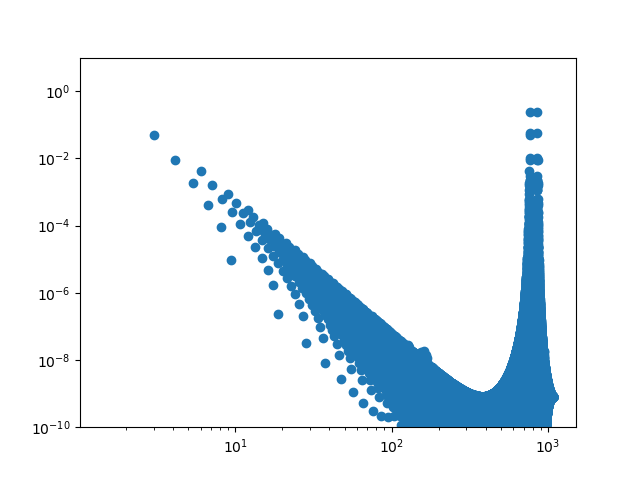

In [9]:
plt.scatter( lis.T[2], lis.T[3] )

# x=np.arange( 1000 )
# y=1.0/x**2
# plt.plot( x,y, ls="dashed", c="orange" )

# y=10.0/x**4
# plt.plot( x,y, ls="dashed", c="orange" )

plt.yscale("log")
plt.xscale("log")
plt.ylim( 1.0e-10, 10 )

/var/folders/mg/t8fn6fpj4bj1f7zd8q4m_6p40000gn/T/ipykernel_20673/3547504063.py:3: RuntimeWarning: invalid value encountered in log
  ax.scatter(lis.T[0], lis.T[1], np.log(lis.T[3]), c='r', marker='o')


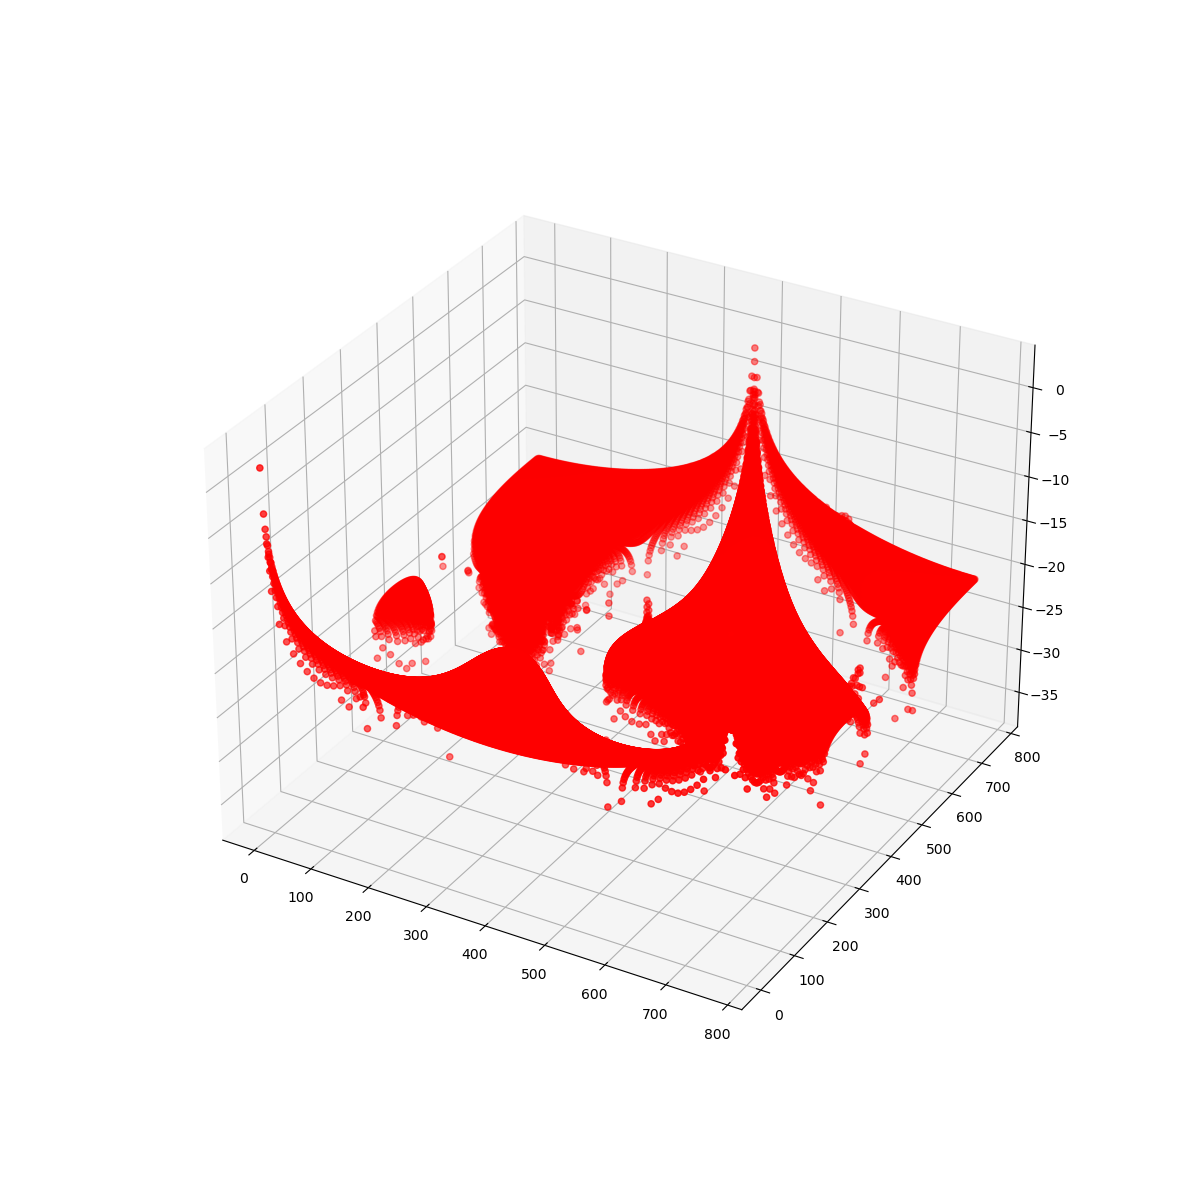

In [10]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(lis.T[0], lis.T[1], np.log(lis.T[3]), c='r', marker='o')

# ax.set_xlabel('X Label')
# ax.set_ylabel('Y Label')
# ax.set_zlabel('Z Label')

# ax.set_zscale("log")

plt.show()

In [9]:
# x, y, a, b, c, s

In [20]:
ta0b0c0d0_ = []
for elem in tt:
    if elem[2]==0 and elem[3]==0 and elem[4]==0 and elem[5]==0:
        ta0b0c0d0_.append( [elem[0], elem[1], np.sqrt(elem[0]**2+elem[1]**2), elem[6]] )
ta0b0c0d0 = np.array(ta0b0c0d0_)

In [21]:
ta0b0c0d0

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         4.50000000e+00],
       [ 3.00000000e+00,  0.00000000e+00,  3.00000000e+00,
        -1.45734812e-01],
       [ 6.00000000e+00,  0.00000000e+00,  6.00000000e+00,
        -3.78437452e-02],
       ...,
       [ 7.61000000e+02,  7.67000000e+02,  1.08046749e+03,
        -2.33406700e-02],
       [ 7.64000000e+02,  7.67000000e+02,  1.08258256e+03,
        -6.01485111e-02],
       [ 7.67000000e+02,  7.67000000e+02,  1.08470180e+03,
        -2.63169323e-01]])

/tmp/ipykernel_142732/941853031.py:4: RuntimeWarning: divide by zero encountered in divide
  y=1.0/x**2
/tmp/ipykernel_142732/941853031.py:7: RuntimeWarning: divide by zero encountered in divide
  y=10.0/x**4


(1e-10, 10)

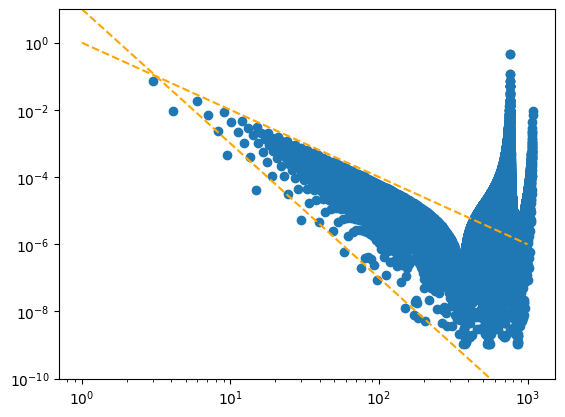

In [34]:
plt.scatter( ta0b0c0d0.T[2], ta0b0c0d0.T[3] )

x=np.arange( 1000 )
y=1.0/x**2
plt.plot( x,y, ls="dashed", c="orange" )

y=10.0/x**4
plt.plot( x,y, ls="dashed", c="orange" )

plt.yscale("log")
plt.xscale("log")
plt.ylim( 1.0e-10, 10 )

In [ ]:
tt.T[6]

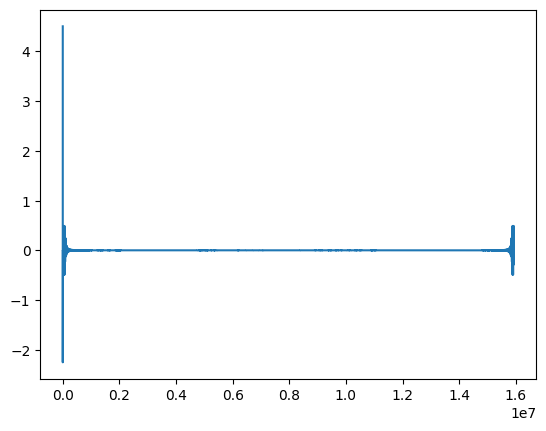

In [15]:
plt.plot(tt.T[6])

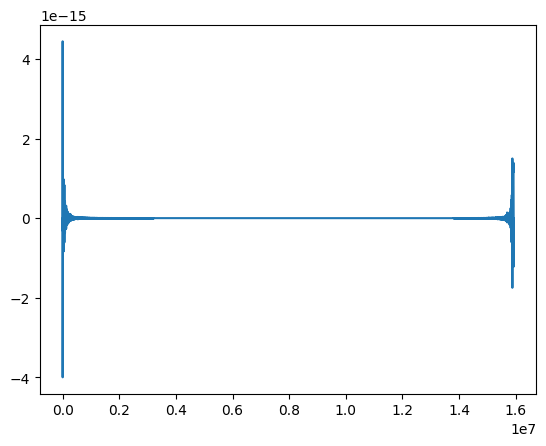

In [17]:
plt.plot(tt.T[7])

In [5]:
def const_exp(x, E0, A, dE):
    return E0 + A*np.exp(-dE*x)

def e_m_k( k, m, A ):
    return A*np.sqrt( m**2 + k**2 )

def e_m( k, m ):
    return np.sqrt( m**2 + k**2 )

In [5]:
fftd_=[]

nn = int(Lx*2/3)

for y1 in range(int(Ly/2)):
    line_chosen=[]
    for line in eps[y1*nn:y1*nn+nn]:
        if line[4]==0:
            if line[1] == y1:
                line_chosen.append([line[0], line[1], line[2] ])
    tslice = np.array( line_chosen ).T[2]
    tsliceF = np.fft.fft( tslice )
    fftd_.append( tsliceF )
fftd=np.array(fftd_)

In [6]:
toplot1 = np.array([ [np.sqrt(line[0]**2+line[1]**2), line[2]] for line in eps ])

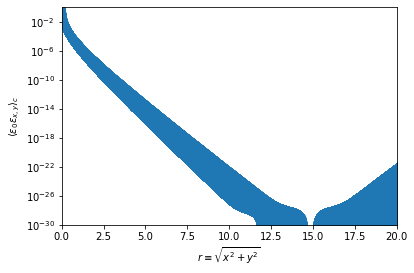

In [76]:
plt.scatter( toplot1.T[0]*alat, toplot1.T[1], rasterized=True )
plt.yscale( "log" )

plt.xlabel( "$r\\equiv \\sqrt{x^2+y^2}$" )
plt.ylabel( "$\\langle \\varepsilon_0 \\varepsilon_{x,y} \\rangle_c$" )

plt.xlim(0, 20.0)
plt.ylim(1.0e-30, 1.0)

plt.savefig( "epseps_corr.pdf", bbox_inches="tight" )

In [10]:
meff_allk_=[]
for k in range(fftd.shape[1]):
    meff=-np.log(fftd.T[k][1:]/fftd.T[k][:-1]).real
    meff_allk_.append(meff)
meff_allk = np.array(meff_allk_)

/var/folders/mg/t8fn6fpj4bj1f7zd8q4m_6p40000gn/T/ipykernel_3512/2531294647.py:3: RuntimeWarning: divide by zero encountered in true_divide
  meff=-np.log(fftd.T[k][1:]/fftd.T[k][:-1]).real
/var/folders/mg/t8fn6fpj4bj1f7zd8q4m_6p40000gn/T/ipykernel_3512/2531294647.py:3: RuntimeWarning: divide by zero encountered in log
  meff=-np.log(fftd.T[k][1:]/fftd.T[k][:-1]).real
/var/folders/mg/t8fn6fpj4bj1f7zd8q4m_6p40000gn/T/ipykernel_3512/2531294647.py:3: RuntimeWarning: invalid value encountered in true_divide
  meff=-np.log(fftd.T[k][1:]/fftd.T[k][:-1]).real


In [37]:
fitm=400
fitM=550

fit_range_=[
    [0,40,80],
#     [1,300,500],
#     [2,300,500],
#     [3,300,500],
#     [4,300,500],
#     [5,300,500],
#     [6,300,500],
#     [7,300,500],
#     [8,300,500],
#     [9,300,500],
#     [10,300,500],
#     [11,300,500],
#     [12,300,500],
#     [13,300,500],
#     [14,300,500],
#     [15,300,400],
#     [16,300,400],
#     [17,300,400],
#     [18,300,400],
#     [19,300,400],
#     [20,250,350],
#     [21,250,350],
#     [22,250,350],
#     [23,250,350],
#     [24,200,300],
]

fit_range=np.array(fit_range_)

(4, 10.0)

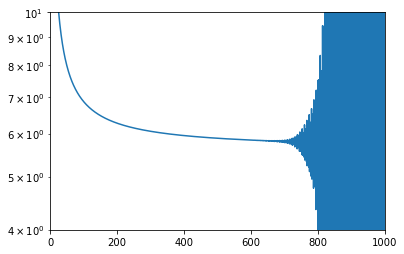

In [42]:
k=25
y = meff_allk[k] / alat
plt.plot(y)
plt.yscale("log")
plt.xlim(0,1000)
plt.ylim(4, 10.0)

(array([3.58358873, 1.06994068, 0.41383698]), array([[1.10524959e-07, 7.21987621e-07, 2.99707893e-07],
       [7.21987621e-07, 4.84671215e-06, 1.98411852e-06],
       [2.99707893e-07, 1.98411852e-06, 8.18066220e-07]]))


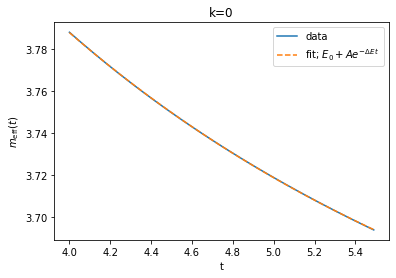

(array([3.58815184, 1.0698025 , 0.41382677]), array([[1.10509008e-07, 7.21812734e-07, 2.99681676e-07],
       [7.21812734e-07, 4.84506391e-06, 1.98375005e-06],
       [2.99681676e-07, 1.98375005e-06, 8.18040898e-07]]))


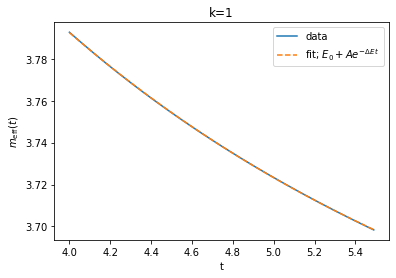

(array([3.60180497, 1.06939031, 0.41379635]), array([[1.10461238e-07, 7.21290683e-07, 2.99603147e-07],
       [7.21290683e-07, 4.84015130e-06, 1.98265104e-06],
       [2.99603147e-07, 1.98265104e-06, 8.17965019e-07]]))


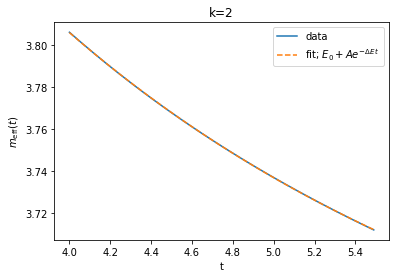

(array([3.6244408 , 1.06871086, 0.41374628]), array([[1.10382736e-07, 7.20431121e-07, 2.99474193e-07],
       [7.20431121e-07, 4.83205765e-06, 1.98084057e-06],
       [2.99474193e-07, 1.98084057e-06, 8.17840924e-07]]))


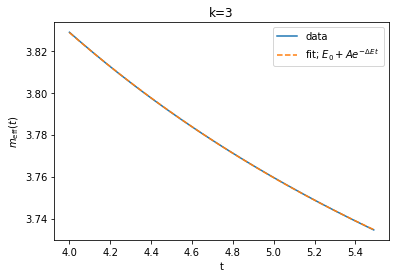

(array([3.65588515, 1.0677751 , 0.41367752]), array([[1.10274393e-07, 7.19249036e-07, 2.99296601e-07],
       [7.19249036e-07, 4.82094775e-06, 1.97835523e-06],
       [2.99296601e-07, 1.97835523e-06, 8.17671981e-07]]))


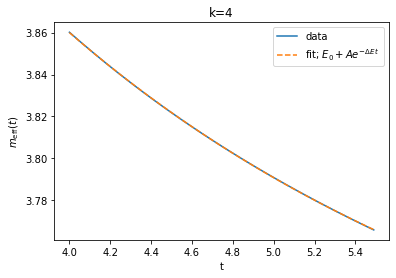

(array([3.69590341, 1.06659757, 0.41359132]), array([[1.10138231e-07, 7.17767002e-07, 2.99074434e-07],
       [7.17767002e-07, 4.80703845e-06, 1.97524680e-06],
       [2.99074434e-07, 1.97524680e-06, 8.17465589e-07]]))


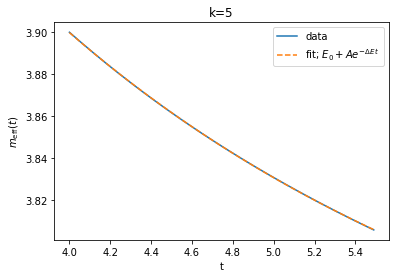

(array([3.74420887, 1.06519564, 0.41348916]), array([[1.09975483e-07, 7.16003604e-07, 2.98809186e-07],
       [7.16003604e-07, 4.79052969e-06, 1.97155353e-06],
       [2.98809186e-07, 1.97155353e-06, 8.17221105e-07]]))


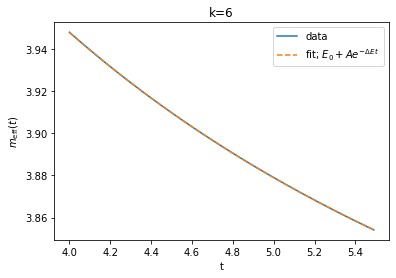

(array([3.80047219, 1.06358877, 0.41337271]), array([[1.09788495e-07, 7.13987171e-07, 2.98505413e-07],
       [7.13987171e-07, 4.77170205e-06, 1.96734040e-06],
       [2.98505413e-07, 1.96734040e-06, 8.16946316e-07]]))


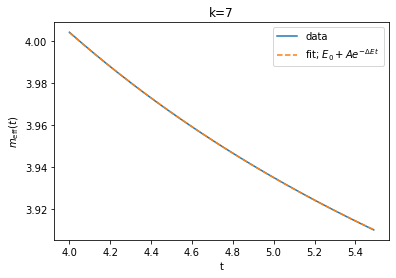

(array([3.86433139, 1.06179789, 0.41324376]), array([[1.09580406e-07, 7.11751989e-07, 2.98169675e-07],
       [7.11751989e-07, 4.75088040e-06, 1.96268767e-06],
       [2.98169675e-07, 1.96268767e-06, 8.16654088e-07]]))


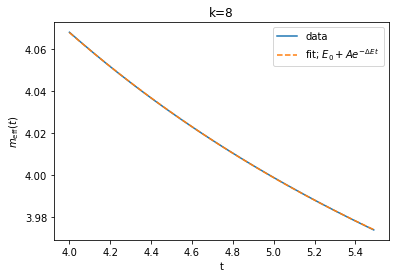

(array([3.93540167, 1.05984445, 0.41310415]), array([[1.09351595e-07, 7.09312929e-07, 2.97800618e-07],
       [7.09312929e-07, 4.72825311e-06, 1.95762014e-06],
       [2.97800618e-07, 1.95762014e-06, 8.16334634e-07]]))


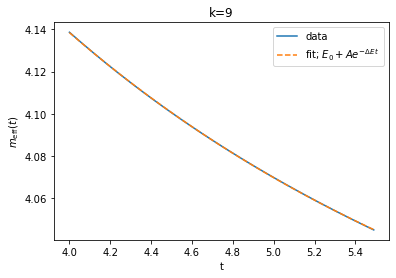

(array([4.0132847 , 1.05774979, 0.41295566]), array([[1.09106098e-07, 7.06710845e-07, 2.97407301e-07],
       [7.06710845e-07, 4.70419175e-06, 1.95223649e-06],
       [2.97407301e-07, 1.95223649e-06, 8.16007777e-07]]))


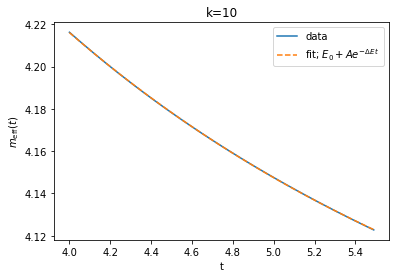

(array([4.09757691, 1.05553482, 0.41280008]), array([[1.08846087e-07, 7.03972882e-07, 2.96993539e-07],
       [7.03972882e-07, 4.67896706e-06, 1.94659702e-06],
       [2.96993539e-07, 1.94659702e-06, 8.15678584e-07]]))


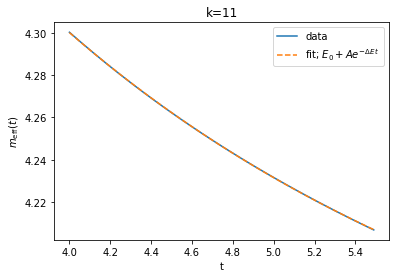

(array([4.1878766 , 1.05321932, 0.41263906]), array([[1.08573279e-07, 7.01121199e-07, 2.96561712e-07],
       [7.01121199e-07, 4.65280285e-06, 1.94074724e-06],
       [2.96561712e-07, 1.94074724e-06, 8.15347638e-07]]))


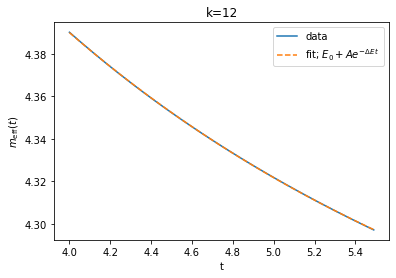

(array([4.28378979, 1.05082186, 0.41247413]), array([[1.08289216e-07, 6.98177899e-07, 2.96114275e-07],
       [6.98177899e-07, 4.62592858e-06, 1.93473626e-06],
       [2.96114275e-07, 1.93473626e-06, 8.15017224e-07]]))


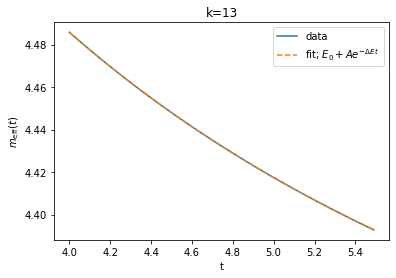

(array([4.38493486, 1.04835954, 0.41230675]), array([[1.07996981e-07, 6.95172095e-07, 2.95657602e-07],
       [6.95172095e-07, 4.59859821e-06, 1.92863048e-06],
       [2.95657602e-07, 1.92863048e-06, 8.14699476e-07]]))


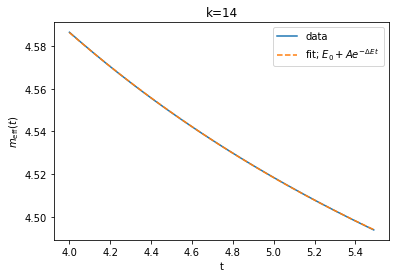

(array([4.49094584, 1.04584778, 0.41213813]), array([[1.07697778e-07, 6.92120491e-07, 2.95193294e-07],
       [6.92120491e-07, 4.57098284e-06, 1.92246491e-06],
       [2.95193294e-07, 1.92246491e-06, 8.14394461e-07]]))


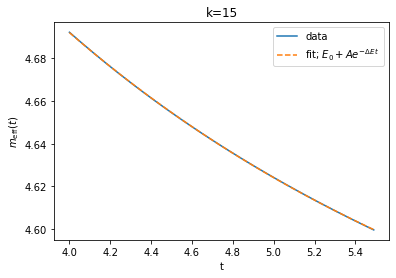

(array([4.60147491, 1.04330032, 0.41196935]), array([[1.07393120e-07, 6.89040905e-07, 2.94723973e-07],
       [6.89040905e-07, 4.54325413e-06, 1.91627888e-06],
       [2.94723973e-07, 1.91627888e-06, 8.14105499e-07]]))


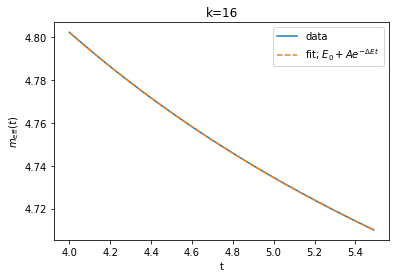

(array([4.71619381, 1.04072941, 0.41180135]), array([[1.07086267e-07, 6.85959950e-07, 2.94256929e-07],
       [6.85959950e-07, 4.51562413e-06, 1.91013529e-06],
       [2.94256929e-07, 1.91013529e-06, 8.13848352e-07]]))


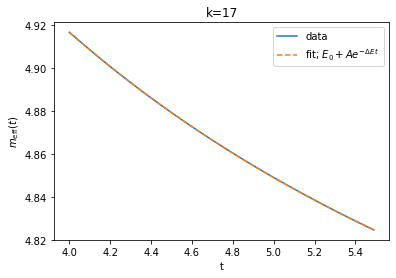

(array([4.83479454, 1.03814535, 0.41163478]), array([[1.06782056e-07, 6.82912917e-07, 2.93803912e-07],
       [6.82912917e-07, 4.48835229e-06, 1.90412220e-06],
       [2.93803912e-07, 1.90412220e-06, 8.13651447e-07]]))


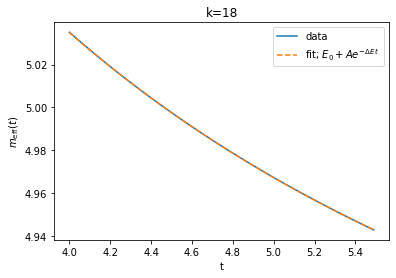

(array([4.9569896 , 1.03555707, 0.41147013]), array([[1.06487504e-07, 6.79947920e-07, 2.93382823e-07],
       [6.79947920e-07, 4.46177610e-06, 1.89836479e-06],
       [2.93382823e-07, 1.89836479e-06, 8.13560684e-07]]))


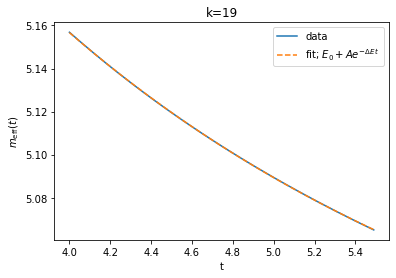

(array([5.08251157, 1.03297155, 0.41130751]), array([[1.06217939e-07, 6.77161985e-07, 2.93034101e-07],
       [6.77161985e-07, 4.43652554e-06, 1.89312234e-06],
       [2.93034101e-07, 1.89312234e-06, 8.13683332e-07]]))


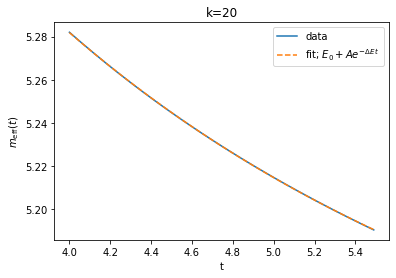

(array([5.21111252, 1.0303937 , 0.4111465 ]), array([[1.06005908e-07, 6.74760444e-07, 2.92846026e-07],
       [6.74760444e-07, 4.41392924e-06, 1.88895889e-06],
       [2.92846026e-07, 1.88895889e-06, 8.14260374e-07]]))


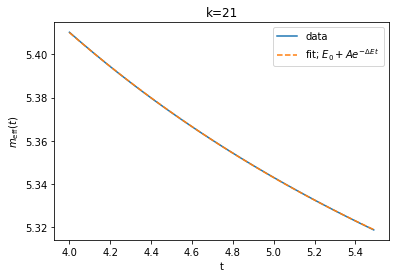

(array([5.34256324, 1.02782742, 0.41098658]), array([[1.05922542e-07, 6.73188736e-07, 2.93013506e-07],
       [6.73188736e-07, 4.39685349e-06, 1.88711140e-06],
       [2.93013506e-07, 1.88711140e-06, 8.15829366e-07]]))


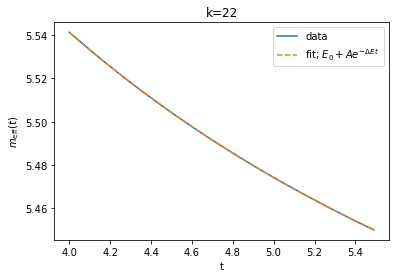

(array([5.47665254, 1.02527696, 0.41082777]), array([[1.06164565e-07, 6.73691550e-07, 2.94081744e-07],
       [6.73691550e-07, 4.39339118e-06, 1.89107564e-06],
       [2.94081744e-07, 1.89107564e-06, 8.19911119e-07]]))


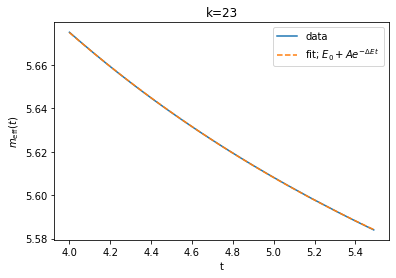

(array([5.61318728, 1.02275331, 0.41067351]), array([[1.07335981e-07, 6.80109430e-07, 2.97733937e-07],
       [6.80109430e-07, 4.42863702e-06, 1.91169703e-06],
       [2.97733937e-07, 1.91169703e-06, 8.31226592e-07]]))


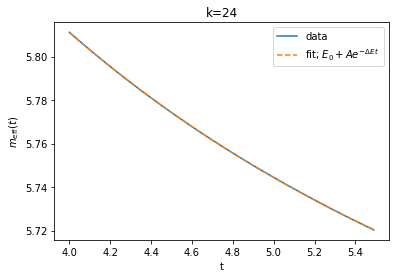

In [61]:
kmax=25

e0_list_=[]
p0 = [2*m, 1.0, 1.0]

for k in range(kmax):
    x=np.arange(fitm,fitM) * alat
    y=meff_allk[k][fitm:fitM] / alat

#     x=np.arange(fit_range[k][1],fit_range[k][2]) * alat
#     y=meff_allk[k][fit_range[k][1]:fit_range[k][2]] / alat

    plt.plot( x, y, label="data" )
    # plt.ylim(0, 0.04)

    fit=sp.optimize.curve_fit(const_exp, x, y, p0)
    plt.plot( x, const_exp( x, fit[0][0], fit[0][1], fit[0][2] ), 
             label="fit; $E_0 + Ae^{-\\Delta E \, t}$",
             ls="dashed")
    p0 = fit[0]
    print(fit)

    plt.title("k="+str(k))
    plt.legend()
    plt.xlabel("t")
    plt.ylabel("$m_{\\rm eff}(t)$")
    plt.savefig( "fit"+str(k)+".pdf", bbox_inches="tight" )
    plt.show()

    e0_list_.append([k, fit[0][0]])

e0_list = np.array(e0_list_)

(array([4.07113268, 0.8806418 ]),
 array([[ 1.73556671e-06, -2.51171870e-07],
        [-2.51171870e-07,  3.95243280e-08]]))

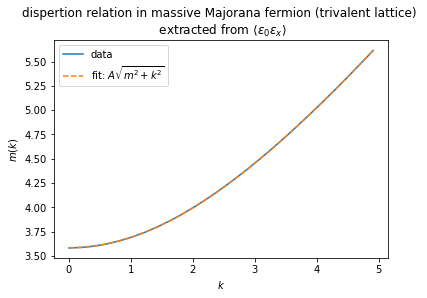

In [58]:
x = e0_list.T[0] * 2.0*np.pi/(Lx*alat)
y = e0_list.T[1] # / (0.5*np.sqrt(3))

plt.plot( x, y, label="data" )

fit=sp.optimize.curve_fit(e_m_k, x, y, p0=[m*2, 1.0])
plt.plot( x, e_m_k( x, fit[0][0], fit[0][1] ), label="fit: $A \\sqrt{m^2+k^2}$", ls="dashed" )

# fit=sp.optimize.curve_fit(e_m, x, y, p0=[m*2])
# plt.plot( x, e_m( x, fit[0][0] ), label="fit" )

# plt.plot( x, x )

plt.xlabel( "$k$" )
plt.ylabel( "$m(k)$" )

plt.legend()

plt.title("dispertion relation in massive Majorana fermion (trivalent lattice) \n extracted from $\\langle \\varepsilon_0 \\varepsilon_x \\rangle$")
plt.savefig( "dispertion_relation.pdf", bbox_inches="tight" )

fit

In [46]:
0.5*np.sqrt(3)

0.8660254037844386

In [ ]:
[Lx*alat, 0.96128146]

In [11]:
[Lx*alat, 0.96128146]

[7.68, 0.96128146]

In [66]:
[Lx*alat, 0.96128146]

[15.36, 0.96128146]

In [64]:
2.0/3.0

0.6666666666666666

/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


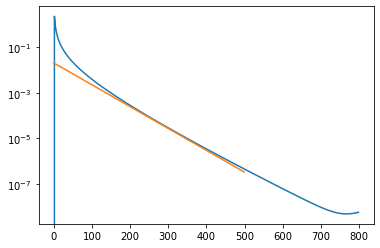

In [24]:
plt.plot( fftd.T[0] )

xx=np.arange(0, 500)
plt.plot( xx, 0.02*np.exp(-0.022*xx) )

plt.yscale("log")

In [25]:
1536/3

512.0

In [221]:
eps[:1024].T[2]

array([-9.50727003,  0.73667837,  0.2839783 , ...,  0.16014711,
        0.2839783 ,  1.78835694])

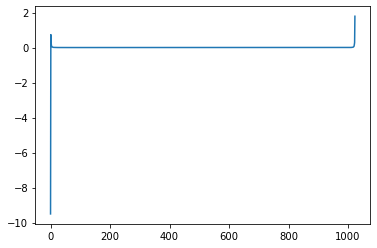

In [222]:
plt.plot( eps[:1024].T[2] )

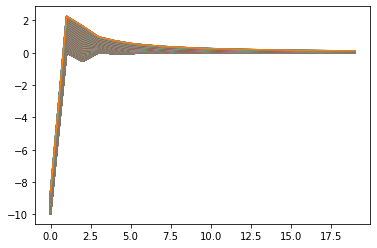

In [156]:
plt.plot(fftd.real)

In [135]:
t=1
tslice = retrieved[t].T[2]

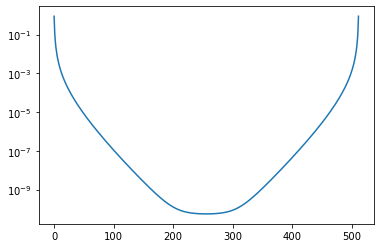

In [136]:
plt.plot(tslice)
plt.yscale("log")

In [113]:
tsliceF = np.fft.fft( tslice )

(0.01, 3.0)

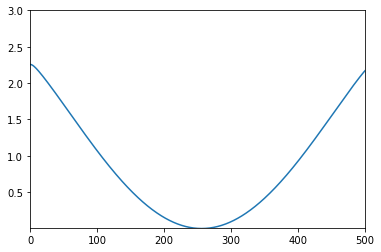

In [128]:
plt.plot( tsliceF.real )

# plt.yscale("log")
plt.xlim(0,500)
plt.ylim(0.01, 3)

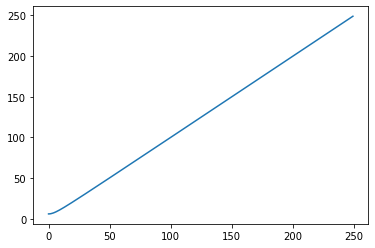

In [134]:
krange=np.arange(0,250)
m=6.0
tt=1

disp = np.sqrt( krange**2 + m**2 )
yyy=-0.5/disp * np.exp(-disp*tt)

plt.plot( krange, disp )

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [26]:
eps2d[0]

array([-9.50727003,  0.73667837,  0.2839783 , ...,  0.16014711,
        0.2839783 ,  1.78835694])

In [27]:
eps2d.T.shape

(1024, 1536)

In [28]:
toplot=np.array([ [np.sqrt(v[0]**2+v[1]**2)*0.01, v[2]] for v in eps ])

toplot2=np.array([ [np.sqrt(v[0]**2+v[1]**2)*0.01, v[2]] for v in eps2 ])

In [29]:
xx = np.linspace(0, 1, 101)

In [30]:
xx

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [31]:
alat=0.01

In [32]:
eps.shape

(1572864, 4)

In [33]:
1/alat

100.0

(0.0, 10.0)

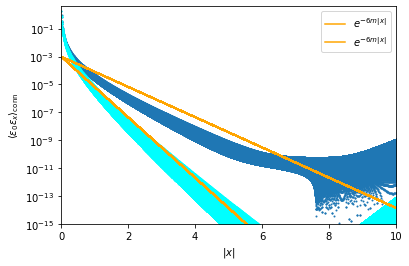

In [34]:
# plt.plot( xx, eps2d[0], label="y=0" )
# plt.plot( xx, eps2d.T[0], label="x=0" )

plt.scatter( toplot.T[0], toplot.T[1], s=1 )
plt.scatter( toplot2.T[0], toplot2.T[1], s=1, c="cyan" )
# plt.plot( xx, np.exp(-xx), label="$1/r^2$" )
plt.plot( toplot.T[0], 0.001*np.exp(-2.5*toplot.T[0]), label="$e^{-6m|x|}$", c="orange" )
plt.plot( toplot.T[0], 0.001*np.exp(-5*toplot.T[0]), label="$e^{-6m|x|}$", c="orange" )

plt.legend()

plt.yscale("log")
# plt.xscale("log")

plt.xlabel("$|x|$")
plt.ylabel("$\\langle \\varepsilon_0 \\varepsilon_x\\rangle_{\\rm conn}$")

plt.ylim(1.0e-15, 4)
plt.xlim(0, 10)

# plt.savefig("../figs/eps_corr.pdf", bbox_inches="tight")

In [6]:
from mpl_toolkits import mplot3d

/var/folders/mg/t8fn6fpj4bj1f7zd8q4m_6p40000gn/T/ipykernel_6655/454102474.py:3: RuntimeWarning: invalid value encountered in log
  ax.scatter( eps.T[0], eps.T[1], np.log(eps.T[2]) )


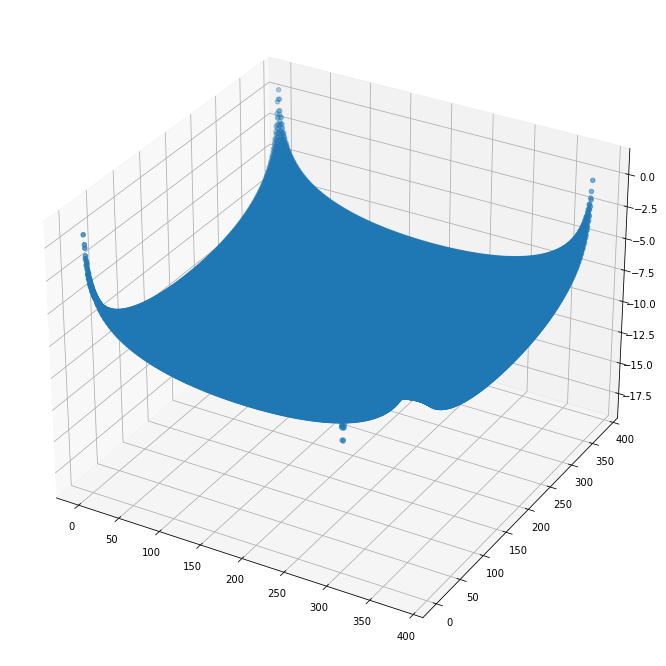

In [7]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter( eps.T[0], eps.T[1], np.log(eps.T[2]) )

# ax.set_yscale("log")

In [34]:
spec_m001 = np.loadtxt("spec_m001.dat")
spec_m1 = np.loadtxt("spec_m1.dat")
Lx = 36
Ly = 36

In [35]:
nvacant = int(Lx*Ly/3)
spec_nontriv_m1 = spec_m1[2*nvacant:]
spec_nontriv_m001 = spec_m001[2*nvacant:]

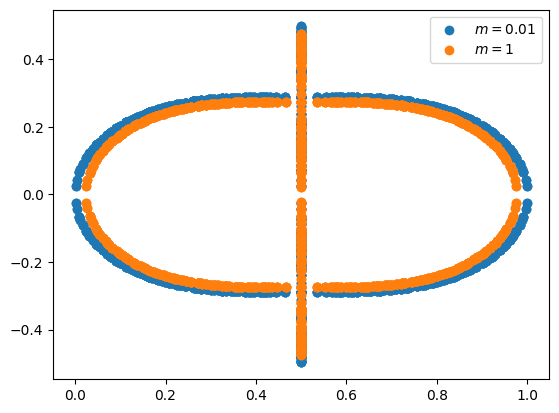

In [36]:
plt.scatter( spec_nontriv_m001.T[0], spec_nontriv_m001.T[1], label="$m=0.01$" )
plt.scatter( spec_nontriv_m1.T[0], spec_nontriv_m1.T[1], label="$m=1$")
plt.legend()

plt.savefig("spectrum.pdf", bbox_inches='tight')

In [ ]:
Lx = 36
Ly = 36

In [37]:
dinv0 = np.loadtxt("Dinv0.dat")
dinv1 = np.loadtxt("Dinv1.dat")

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 3: invalid start byte

In [60]:
y0psipsi=np.loadtxt("y0_psipsi.dat")
alat=0.01

In [61]:
xx=y0psipsi.T[0]*alat

/tmp/ipykernel_273721/2249424689.py:5: RuntimeWarning: divide by zero encountered in divide
  plt.plot( xx, 0.000001/xx**3 )


(1e-10, 1.0)

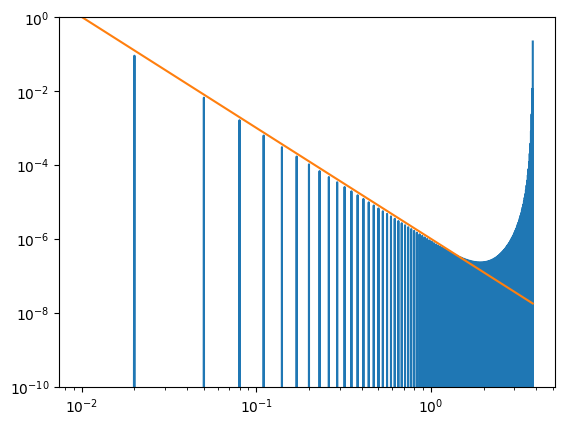

In [74]:
plt.plot( xx, y0psipsi.T[1] )
plt.yscale("log")
plt.xscale("log")

plt.plot( xx, 0.000001/xx**3 )

plt.ylim(1.0e-10, 1.0)

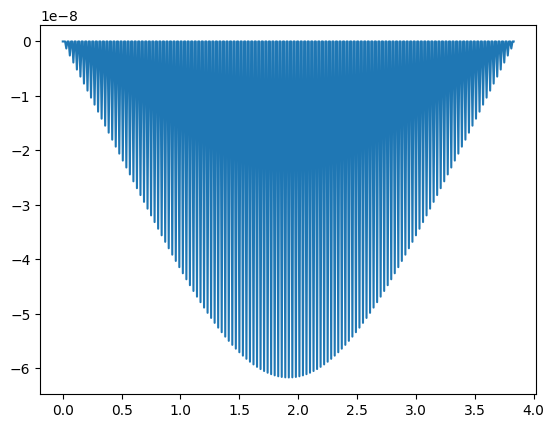

In [75]:
plt.plot( xx, y0psipsi.T[2] )

/tmp/ipykernel_273721/51402980.py:5: RuntimeWarning: divide by zero encountered in divide
  plt.plot( xx, 0.008/xx**1.0 )


(0.001, 1.0)

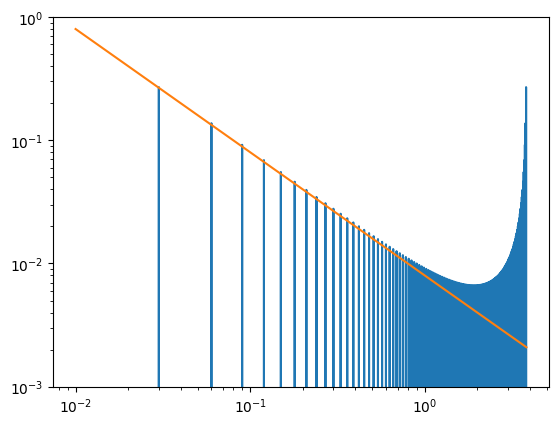

In [89]:
plt.plot( xx, y0psipsi.T[3] )
plt.yscale("log")
plt.xscale("log")

plt.plot( xx, 0.008/xx**1.0 )

plt.ylim(1.0e-3, 1.0)

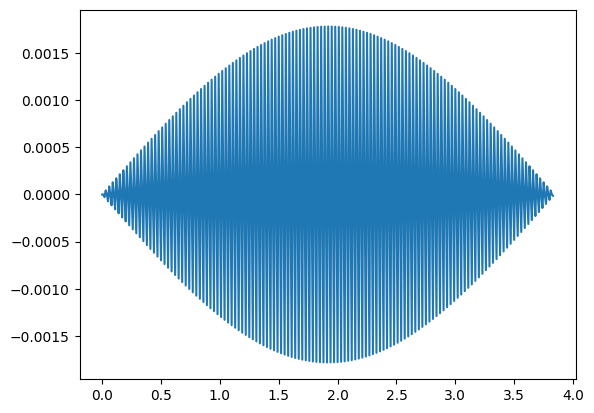

In [83]:
plt.plot( xx, y0psipsi.T[4] )